Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to

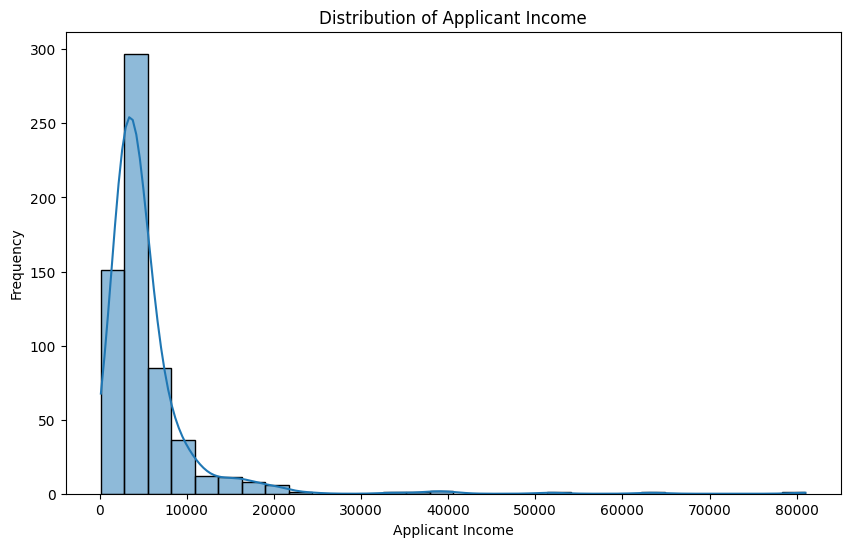

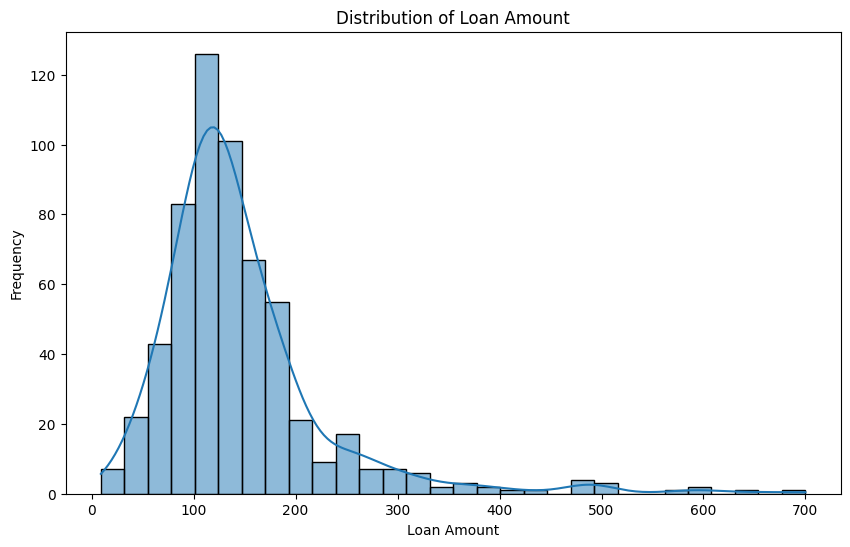

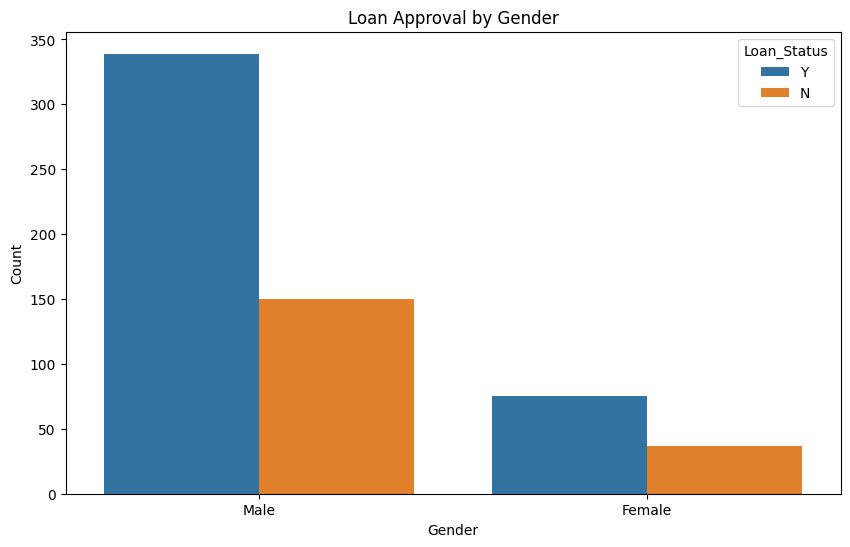

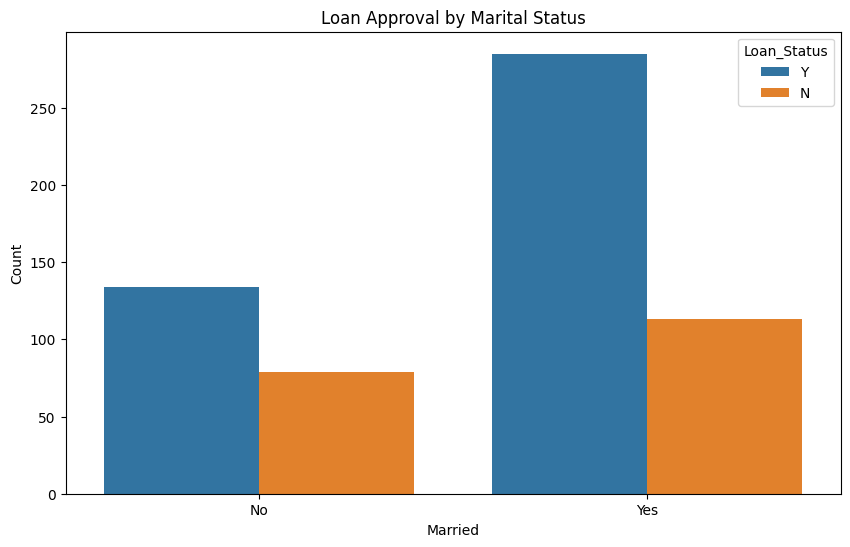

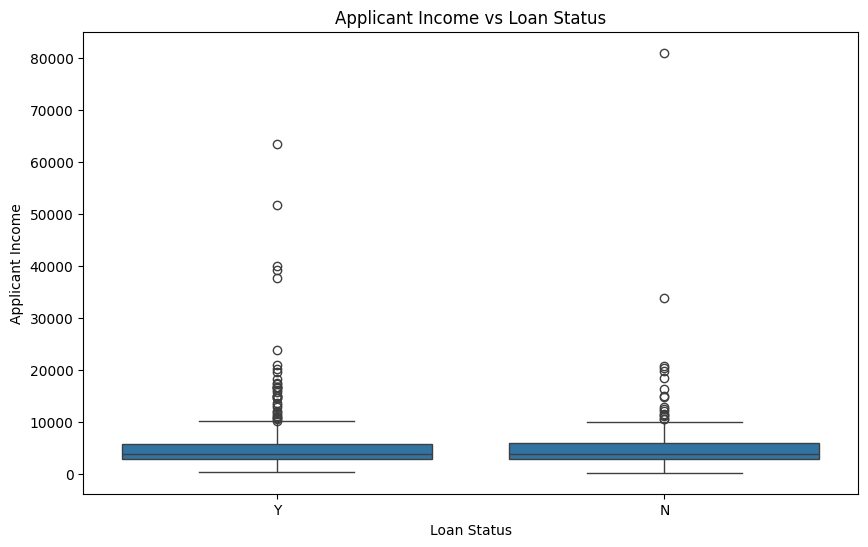

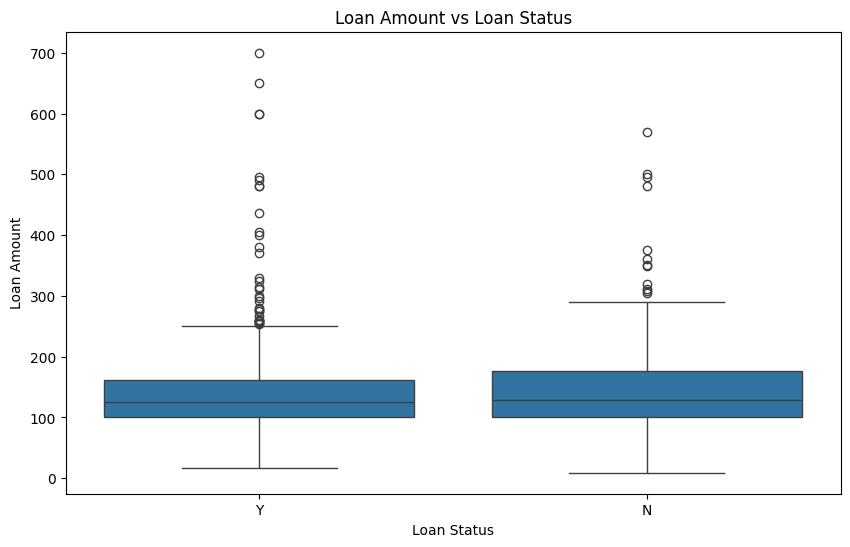

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load train and test datasets
train_data = pd.read_csv('/content/train_ctrUa4K.csv')
test_data = pd.read_csv('/content/test_lAUu6dG.csv')

# Display structure and features of train dataset
print("Train Dataset Info:")
print(train_data.info())

# Display structure and features of test dataset
print("\nTest Dataset Info:")
print(test_data.info())

# Check for missing values in train dataset
print("\nMissing Values in Train Dataset:")
print(train_data.isnull().sum())

# Check for missing values in test dataset
print("\nMissing Values in Test Dataset:")
print(test_data.isnull().sum())

# Summary statistics of numerical features
print("\nSummary Statistics of Numerical Features in Train Dataset:")
print(train_data.describe())

# Explore distributions of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(train_data['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Explore relationship between categorical features and target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.title('Loan Approval by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Married', hue='Loan_Status', data=train_data)
plt.title('Loan Approval by Marital Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

# Explore relationship between numerical features and target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_data)
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_data)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load train dataset

# Handle missing values
# Impute missing values for numerical features
num_imputer = SimpleImputer(strategy='mean')
train_data[['LoanAmount', 'Loan_Amount_Term']] = num_imputer.fit_transform(train_data[['LoanAmount', 'Loan_Amount_Term']])

# Impute missing values for categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']] = cat_imputer.fit_transform(train_data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']])

# Encode categorical variables
# One-hot encoding for categorical features with multiple categories
train_data = pd.get_dummies(train_data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Label encoding for categorical features with binary categories
label_encoder = LabelEncoder()
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

# Scale numerical features if necessary
scaler = StandardScaler()
train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

# Split the train data into features (X) and target variable (y)
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed data
print("Processed Features:")
print(X_train.head())
print("\nTarget Variable:")
print(y_train.head())


Processed Features:
    Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
83           0         0.097728           0.215042    1.412281   
90           0        -0.400628           0.437351   -0.183546   
227          2         0.138685           0.025225    0.757277   
482          0        -0.543975           0.522854   -0.219273   
464          0        -0.202727          -0.554487   -0.576548   

     Loan_Amount_Term Credit_History  Gender_Male  Married_Yes  \
83           0.279851            1.0         True         True   
90           0.279851            1.0         True         True   
227          0.279851            1.0         True         True   
482          0.279851            1.0         True         True   
464          0.279851            0.0         True        False   

     Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
83                    False              False                     True   
90                    False         

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Initialize models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Train and evaluate each model using cross-validation
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__}: Mean Accuracy: {scores.mean()}, Std Dev: {scores.std()}")

# Choose the best model based on performance
best_model = max(models, key=lambda x: cross_val_score(x, X_train, y_train, cv=5, scoring='accuracy').mean())

# Train the best model on the entire train dataset
best_model.fit(X_train, y_train)

# Evaluate the best model on the test dataset
test_accuracy = best_model.score(X_test, y_test)
print(f"\nBest Model: {best_model.__class__.__name__}")
print(f"Test Accuracy: {test_accuracy}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 810, in check_array
    array = array.astype(new_dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 451, in astype
    return self.apply(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: '3+'


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Model evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Evaluate the model on validation set
evaluation_result = evaluate_model(y_val, y_pred)
print("Evaluation Result on Validation Set:")
for metric, value in evaluation_result.items():
    print(f"{metric}: {value}")

# Prediction on test dataset
test_pred = model.predict(X_test)

# Replace the 'Loan_Status' column in the sample submission file
submission['Loan_Status'] = np.where(test_pred == 1, 'Y', 'N')

# Save the updated submission file
submission.to_csv('submission.csv', index=False)


NameError: name 'y_val' is not defined